In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
cps = pd.get_dummies(df['cp']).rename(columns = {0:'cp_1',1:'cp_2',2:'cp_3',3:'cp_4'})

In [15]:
df = pd.concat([df,cps],axis=1)
df.drop('cp',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,cp_4
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [17]:
thals = pd.get_dummies(df['thal']).rename(columns = {0:'thal_0',1:'thal_1',2:'thal_2',3:'thal_3'})

In [18]:
df = pd.concat([df,thals],axis=1)
df.drop('thal',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,0,1,0


In [19]:
x = df.drop('target',axis=1)
y = df['target']

In [20]:
x.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.471947,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.500038,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
x_sc = pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)

In [25]:
x_sc.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,1.202192e-15,-3.297692e-16,3.341661e-16,1.183505e-16,-1.218314e-17,-1.282436e-17,6.020120e-16,4.125779e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
25%,-7.572802e-01,-1.468418e+00,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
50%,6.988599e-02,6.810052e-01,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,-7.931155e-01
75%,7.316189e-01,6.810052e-01,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.057772e+00,-4.445542e-01,1.575677e+00,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,1.260850e+00
max,2.496240e+00,6.810052e-01,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.057772e+00,2.249444e+00,1.575677e+00,3.489114e+00,1.226784e+01,3.979112e+00,9.084609e-01,1.260850e+00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  target    303 non-null    int64  
 12  cp_1      303 non-null    uint8  
 13  cp_2      303 non-null    uint8  
 14  cp_3      303 non-null    uint8  
 15  cp_4      303 non-null    uint8  
 16  thal_0    303 non-null    uint8  
 17  thal_1    303 non-null    uint8  
 18  thal_2    303 non-null    uint8  
 19  thal_3    303 non-null    uint8  
dtypes: float64(1), int64(11), uint8(

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x_sc, y, test_size=0.3, random_state=101)

In [28]:
model = KNeighborsClassifier().fit(xtrain,ytrain)

In [29]:
model.score(xtest,ytest)

0.7802197802197802

In [30]:
model.score(xtrain,ytrain)

0.8820754716981132

In [31]:
scores = []
for i in range(3,31):
    model_i = KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    scores.append(model_i.score(xtest,ytest))

In [38]:
import numpy as np

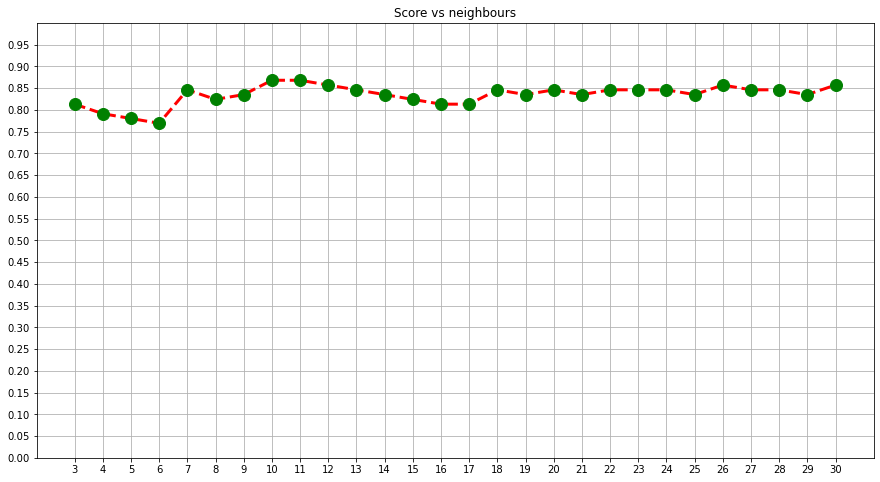

In [39]:
plt.figure(figsize=(15,8))
plt.plot(range(3,31),scores, color='r',linestyle='--',lw=3,marker='o',markerfacecolor='green',markeredgecolor='green',markersize=12)
plt.xticks(range(3,31))
plt.ylim([0,1])
plt.yticks(np.arange(0.0,1.0,0.05))
plt.title('Score vs neighbours')
plt.grid()

In [41]:
model_knn = KNeighborsClassifier(n_neighbors=11).fit(xtrain,ytrain)
print(round(model_knn.score(xtest,ytest)*100,2),'%')

86.81 %


In [42]:
from sklearn.svm import SVC

In [43]:
model_svc = SVC().fit(xtrain,ytrain)
print(round(model_svc.score(xtest,ytest)*100,2),'%')

83.52 %


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(round(model_rf.score(xtest,ytest)*100,2),'%')

82.42 %


In [46]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,test_size=0.3, random_state=101)

In [47]:
model_rf1 = RandomForestClassifier().fit(xtrain1,ytrain1)
print(round(model_rf1.score(xtest1,ytest1)*100,2),'%')

82.42 %


In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model_bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag.score(xtest,ytest)*100,2),'%')

84.62 %


In [51]:
model_bag2 = BaggingClassifier(SVC(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag2.score(xtest,ytest)*100,2),'%')

84.62 %


In [56]:
model_bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

84.62 %


In [57]:
!pip install xgboost

In [59]:
import xgboost as xgb

In [61]:
model_xgb = xgb.XGBClassifier().fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
print(round(model_xgb.score(xtest,ytest)*100,2),'%')

80.22 %


In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model_legit = LogisticRegression().fit(xtrain,ytrain)
print(round(model_legit.score(xtest,ytest)*100,2),'%')

84.62 %
